In [1]:
import pandas as pd

In [2]:
pima = pd.read_csv('Datasets/diabetes2.csv')

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
'''In particular, all patients here are females at least 21 years old of Pima Indian heritage
Labels:
1: diabetes
0: no diabetes'''

'In particular, all patients here are females at least 21 years old of Pima Indian heritage\nLabels:\n1: diabetes\n0: no diabetes'

In [5]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

In [6]:
# splitting data
from sklearn.model_selection import train_test_split
X = pima[feature_cols]
y = pima['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression 
# training the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/zainraza/Downloads/dev/courses/DS/DS-2.1-Machine-Learning/env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# make prediction
y_pred = logreg.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]


In [9]:
print(y_test.values.T)  # transposing data for comparison

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


In [10]:
# Stats on y_test
actual_diabetes = len([val for val in y_test if val == 1])

In [11]:
actual_diabetes

62

In [12]:
actual_non_diabetes = len([val for val in y_test if val == 0])

In [13]:
actual_non_diabetes

130

In [14]:
# alternatively, you use pandas methods to get stats on y_test
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [15]:
# why 192 elements in y_test?
# verfiy that it's 25% of the data:
len(y) * .25 == len(y_test)

True

In [16]:
# do the same for training data
len(y) * .75 == len(y_train)

True

(array([130.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  62.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

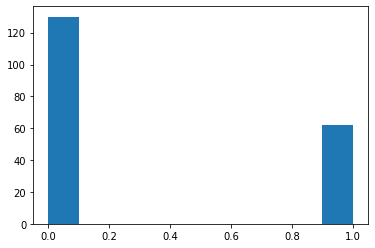

In [17]:
import matplotlib.pyplot as plt

plt.hist(y_test)

In [18]:
def compute_confusion_matrix(y_test, y_pred):
    '''Counts the true and false negatives and positives computed by a model.'''
    tn, tp, fn, fp = 0, 0, 0, 0
    
    for actual, predicted in zip(y_test, y_pred):
        if actual == predicted == 1:
            tn += 1
        elif actual == predicted == 0:
            tp += 1
        elif actual == 0 and not predicted == actual:
            fn += 1
        elif actual == 1 and not predicted == actual:
            fp += 1
            
    assert tn + tp + fn + fp == len(y_test)  # sum of counts = length of y_test/y_pred
    print(f'True Positives: {tp}')
    print(f'True Negatives: {tn}')
    print(f'False Positives: {fp}')
    print(f'False Negatives {fn}')
    return tn, tp, fn, fp
     
compute_confusion_matrix(y_test, y_pred)

True Positives: 118
True Negatives: 15
False Positives: 47
False Negatives 12


(15, 118, 12, 47)

In [19]:
# using the built-in function
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[118  12]
 [ 47  15]]


In [34]:
# how to see predictions with their probabilities
y_pred_prob = logreg.predict_proba(X_test)

In [35]:
logreg.classes_  # shows the values for the classes  'Negative (not ok)', 'Positive (ok)'

array([0, 1])

In [36]:
print(y_pred_prob)  # cols here shows the probability that the sample falls in the corresponding col 
# in the classes list

[[0.63247571 0.36752429]
 [0.71643656 0.28356344]
 [0.71104114 0.28895886]
 [0.5858938  0.4141062 ]
 [0.84103973 0.15896027]
 [0.82934844 0.17065156]
 [0.50110974 0.49889026]
 [0.48658459 0.51341541]
 [0.72321388 0.27678612]
 [0.32810562 0.67189438]
 [0.64244443 0.35755557]
 [0.25912035 0.74087965]
 [0.63949765 0.36050235]
 [0.76987637 0.23012363]
 [0.57345769 0.42654231]
 [0.80896485 0.19103515]
 [0.54236399 0.45763601]
 [0.8809859  0.1190141 ]
 [0.56071047 0.43928953]
 [0.63038849 0.36961151]
 [0.55812011 0.44187989]
 [0.62388338 0.37611662]
 [0.80183978 0.19816022]
 [0.58322696 0.41677304]
 [0.84451719 0.15548281]
 [0.7468329  0.2531671 ]
 [0.90256923 0.09743077]
 [0.30366288 0.69633712]
 [0.84641691 0.15358309]
 [0.7802164  0.2197836 ]
 [0.56905168 0.43094832]
 [0.65783942 0.34216058]
 [0.77603886 0.22396114]
 [0.61926457 0.38073543]
 [0.86657866 0.13342134]
 [0.61209784 0.38790216]
 [0.52950297 0.47049703]
 [0.83795257 0.16204743]
 [0.70451824 0.29548176]
 [0.69081839 0.30918161]


In [27]:
def get_metrics(confusion):
    # tn, fp, fn, tp = confusion.ravel()
    tn = confusion[0][0]
    fp = confusion[0][1]
    fn = confusion[1][0]
    tp = confusion[1][1]
    sum_all = tn + fp + fn + tp
    accuracy = round((tp + tn) / sum_all, 4)
    precision = round(tp/(tp + fp), 4)
    recall = round(tp / (tp + fn), 4)
    f1_score = round((2 * precision * recall)/(precision + recall), 4)
    return accuracy, precision, recall, f1_score

accuracy, precision, recall, f1_score = get_metrics(confusion)
print('Accuracy', accuracy)
print('Precisin', precision)
print('Recall', recall)
print('F1 Score', f1_score)

Accuracy 0.6927
Precisin 0.5556
Recall 0.2419
F1 Score 0.3371


In [86]:
def classify_on_threshold(y_pred_prob, threshold):
    y_pred = list()
    for i in range(len(y_pred_prob)):
        if y_pred_prob[i][1] < threshold:
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred

y_pred_prob = logreg.predict_proba(X_test)
threshold = 0.5
y_pred = classify_on_threshold(y_pred_prob, threshold)
print(y_pred)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [93]:
# threshold = y_train.value_counts()[1] / len(y_train)
threshold = .335195

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([0.36752429, 0.39401943, 0.42051457, 0.44700972, 0.47350486,
        0.5       , 0.52649514, 0.55299028, 0.57948543, 0.60598057,
        0.63247571]),
 <a list of 2 Lists of Patches objects>)

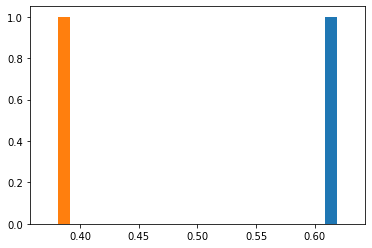

In [94]:
plt.hist(y_pred_prob[:1])

In [95]:
y_pred = classify_on_threshold(y_pred_prob, threshold)
print(y_pred)

[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]


In [96]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84 46]
 [17 45]]


In [97]:
accuracy, precision, recall, f1_score = get_metrics(cm)
print('Accuracy', accuracy)
print('Precision', precision)
print('Recall', recall)
print('F1 Score', f1_score)

Accuracy 0.6719
Precision 0.4945
Recall 0.7258
F1 Score 0.5882


In [85]:
from sklearn.preprocessing import binarize
def rerun_model(model, y_train, ):
    '''
    1. get new prob
    2. get threshold
    3. get new pred
    4. compute new cm using y pred and test
    5. get the new metrics
    '''
    pass

In [72]:
import seaborn as sns

In [102]:
from sklearn.model_selection import cross_val_score 
import pandas as pd
from sklearn.linear_model import LogisticRegression

pima = pd.read_csv('Datasets/diabetes2.csv')

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

# X is a matrix,access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima['Outcome']

print(y.value_counts()[0])
print(y.value_counts()[1])

logreg = LogisticRegression(class_weight={1: 500/268}, solver='lbfgs')
#logreg = LogisticRegression(class_weight={1: y.value_counts()[0]/y.value_counts()[1]})
# logreg = LogisticRegression()

all_accuracies = cross_val_score(estimator=logreg, X=X, y=y, cv=5, scoring='accuracy')
print(all_accuracies)
print(all_accuracies.mean())

all_f1 = cross_val_score(estimator=logreg, X=X, y=y, cv=5, scoring='f1')
print(all_f1)
print(all_f1.mean())

500
268
[0.64935065 0.65584416 0.64935065 0.70588235 0.65359477]
0.6628045157456922
[0.578125   0.55462185 0.54237288 0.64       0.576     ]
0.5782239460190857


In [104]:
## Grid Search for Parameter Selection

from sklearn import svm, GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

ImportError: cannot import name 'grid_search' from 'sklearn' (/Users/zainraza/Downloads/dev/courses/DS/DS-2.1-Machine-Learning/env/lib/python3.7/site-packages/sklearn/__init__.py)